In [72]:
# Importing the dependencies.
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[8, 6, 4, 5, 0, 9, 1, 7, 2, 3]


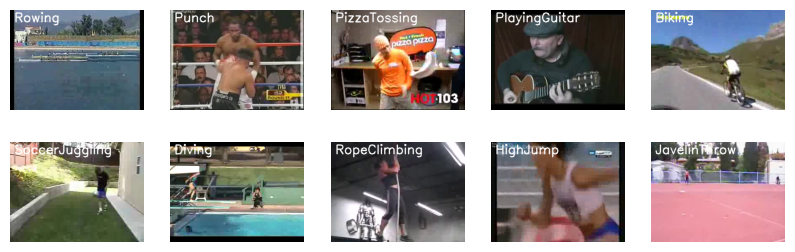

In [73]:
# Visualizing the dataset
all_classes_names = os.listdir('UCF50')

random_range = random.sample(range(len(all_classes_names)), 10)
print(random_range)

plt.figure(figsize = (10, 10))

for counter, random_index in enumerate(random_range, 1): # 1 indicates that counter starts from 1.

    selected_class_name = all_classes_names[random_index]
    video_files_names = os.listdir(f'UCF50/{selected_class_name}')

    selected_video_file_name = random.choice(video_files_names)
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_name}/{selected_video_file_name}')
    _, bgr_frame = video_reader.read()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    
    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame
    plt.subplot(6, 5, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [74]:
sequence_length = 20
class_list = ["Diving", "Punch", "Biking", "Rowing"]

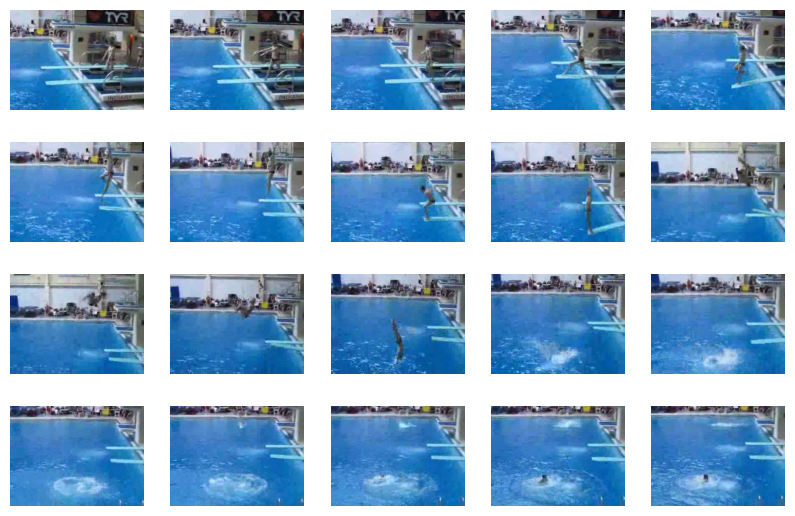

In [75]:
video_reader = cv2.VideoCapture('UCF50\Diving\\v_Diving_g01_c05.avi')
video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT)) # CAP_PROP_FRAME_COUNT counts the number of frames in the video
skip_frames_window = max(int(video_frames_count/sequence_length), 1)

plt.figure(figsize = (10, 10))

for frame_counter in range(1, sequence_length+1):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window) # CAP_PROP_POS_FRAMES sets the current frame position
    success, frame = video_reader.read()
    rg_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    plt.subplot(6, 5, frame_counter)
    plt.imshow(rg_frame)
    plt.axis('off')

In [76]:
def frames_extraction(video_path):

    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT)) 
    # print(f"No. of frames: {video_frames_count}")

    skip_frames_window = max(int(video_frames_count/sequence_length), 1)
    # print(f"Skip frames: {skip_frames_window}")

    for frame_counter in range(sequence_length):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window) 
        success, frame = video_reader.read()

        if not success:
            break

        # Resize and normalize the frame
        resized_frame = cv2.resize(frame, (64, 64))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)

    return frames_list

In [77]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(class_list):

        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join('UCF50', class_name))

        for file_name in files_list:

            video_file_path = os.path.join('UCF50', class_name, file_name)
            frames = frames_extraction(video_file_path)

            if len(frames) == sequence_length:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [78]:
# Create the dataset
features, labels, video_files_paths = create_dataset()
print(video_files_paths)

Extracting Data of Class: Diving
Extracting Data of Class: Punch
Extracting Data of Class: Biking
Extracting Data of Class: Rowing
['UCF50\\Diving\\v_Diving_g01_c01.avi', 'UCF50\\Diving\\v_Diving_g01_c02.avi', 'UCF50\\Diving\\v_Diving_g01_c03.avi', 'UCF50\\Diving\\v_Diving_g01_c04.avi', 'UCF50\\Diving\\v_Diving_g01_c05.avi', 'UCF50\\Diving\\v_Diving_g01_c06.avi', 'UCF50\\Diving\\v_Diving_g01_c07.avi', 'UCF50\\Diving\\v_Diving_g02_c01.avi', 'UCF50\\Diving\\v_Diving_g02_c02.avi', 'UCF50\\Diving\\v_Diving_g02_c03.avi', 'UCF50\\Diving\\v_Diving_g02_c04.avi', 'UCF50\\Diving\\v_Diving_g02_c05.avi', 'UCF50\\Diving\\v_Diving_g02_c06.avi', 'UCF50\\Diving\\v_Diving_g02_c07.avi', 'UCF50\\Diving\\v_Diving_g03_c01.avi', 'UCF50\\Diving\\v_Diving_g03_c02.avi', 'UCF50\\Diving\\v_Diving_g03_c03.avi', 'UCF50\\Diving\\v_Diving_g03_c04.avi', 'UCF50\\Diving\\v_Diving_g03_c05.avi', 'UCF50\\Diving\\v_Diving_g03_c06.avi', 'UCF50\\Diving\\v_Diving_g03_c07.avi', 'UCF50\\Diving\\v_Diving_g03_c08.avi', 'UCF50\\Di

In [79]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [80]:
from tensorflow.keras.utils import to_categorical

one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [81]:

from sklearn.model_selection import train_test_split

In [82]:
# Spliting the data into train (75%) and test set (25%)
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True)

In [83]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
def create_CNLS_model():

    model = Sequential()
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'), input_shape = (sequence_length, 64, 64, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(class_list), activation = 'softmax'))

    model.summary()
    
    return model

In [85]:
# Creating the model
CNLS_model = create_CNLS_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 4, 4, 32)     0

In [86]:
# Training and optimization
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
CNLS_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
CNLS_model_training = CNLS_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/30
89/89 [==============================] - 14s 83ms/step - loss: 1.2912 - accuracy: 0.3904 - val_loss: 1.0247 - val_accuracy: 0.5444
Epoch 2/30
89/89 [==============================] - 5s 60ms/step - loss: 0.9055 - accuracy: 0.5983 - val_loss: 0.7623 - val_accuracy: 0.7222
Epoch 3/30
89/89 [==============================] - 5s 59ms/step - loss: 0.8878 - accuracy: 0.6152 - val_loss: 0.8078 - val_accuracy: 0.6889
Epoch 4/30
89/89 [==============================] - 5s 58ms/step - loss: 0.6990 - accuracy: 0.7219 - val_loss: 0.6540 - val_accuracy: 0.7333
Epoch 5/30
89/89 [==============================] - 5s 61ms/step - loss: 0.5189 - accuracy: 0.7978 - val_loss: 0.5228 - val_accuracy: 0.8222
Epoch 6/30
89/89 [==============================] - 5s 54ms/step - loss: 0.5094 - accuracy: 0.8174 - val_loss: 0.5652 - val_accuracy: 0.8444
Epoch 7/30
89/89 [==============================] - 5s 60ms/step - loss: 0.4481 - accuracy: 0.8174 - val_loss: 0.5979 - val_accuracy: 0.7556
Epoch 8/30
8

In [87]:
# Evaluating the trained model
model_evaluation = CNLS_model.evaluate(features_test, labels_test)

5/5 [==============================] - 1s 88ms/step - loss: 0.2040 - accuracy: 0.9463


In [88]:
CNLS_model_training.history

{'loss': [1.29117751121521,
  0.9054837822914124,
  0.887794554233551,
  0.6990033984184265,
  0.5189388394355774,
  0.5093658566474915,
  0.44811227917671204,
  0.3975742757320404,
  0.6311957836151123,
  0.4330773651599884,
  0.31120163202285767,
  0.2845699191093445,
  0.2404373288154602,
  0.24730363488197327,
  0.2317664474248886,
  0.31965890526771545,
  0.31337520480155945,
  0.24009938538074493,
  0.2705780565738678,
  0.12791754305362701,
  0.09925109148025513,
  0.1200462058186531,
  0.10619816929101944,
  0.3750251531600952,
  0.1861671507358551,
  0.13218741118907928,
  0.2667420208454132,
  0.2611417770385742,
  0.19327399134635925,
  0.12123939394950867],
 'accuracy': [0.3904494345188141,
  0.5983145833015442,
  0.6151685118675232,
  0.7219101190567017,
  0.7977527976036072,
  0.817415714263916,
  0.817415714263916,
  0.8426966071128845,
  0.7696629166603088,
  0.8455055952072144,
  0.9016854166984558,
  0.9101123809814453,
  0.9241573214530945,
  0.9129213690757751,
  0.

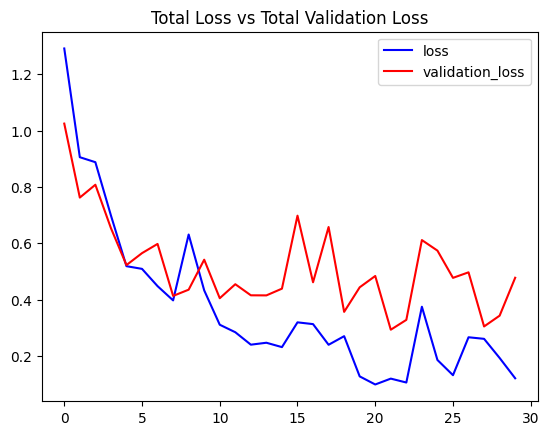

In [89]:
# Visualizing the training and validation loss
plt.plot(CNLS_model_training.history['loss'], 'blue', label = 'loss')
plt.plot(CNLS_model_training.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

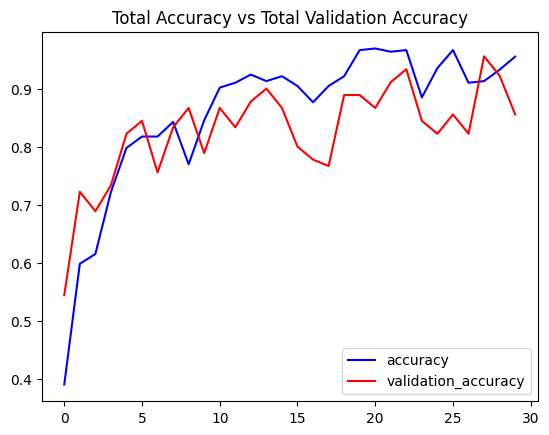

In [90]:
# Visualizing the training and validation accuracy
plt.plot(CNLS_model_training.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(CNLS_model_training.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend(loc = 'lower right')
plt.show()